In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# Load Dataset
file_path = "/content/intel_student_data_1200.csv"  # Upload file in Colab

df = pd.read_csv(file_path)

In [4]:
df.head()

,Name,Age,Gender,Country,State,City,Parent Occupation,Earning Class,Level of Student,Level of Course,Course Name,Assessment Score,How Much Time Per Day,Material Level,IQ of Student
0,John Coffey,18,Male,USA,Bavaria,Bangalore,Teacher,Middle,Beginner,Beginner,Chemistry,67,2.176065,Basic,101
1,Dawn Mullins,18,Male,UK,Tamilnadu,Houston,Doctor,Middle,Beginner,Intermediate,English,76,2.280891,Standard,93
2,Jennifer Morris,18,Female,India,Bavaria,Bangalore,Driver,High,Intermediate,Intermediate,Biology,69,5.049812,Advanced,101
3,Michelle Rodriguez,18,Other,India,kerala,New York City,Engineer,Low,Beginner,Advanced,English,72,3.000683,Standard,108
4,Gregory Chambers,18,Male,UK,Karnataka,Munich,Farmer,High,Advanced,Advanced,Maths,91,3.782130,Basic,100


In [5]:
# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Name                     0
Age                      0
Gender                   0
Country                  0
State                    0
City                     0
Parent Occupation        0
Earning Class            0
Level of Student         0
Level of Course          0
Course Name              0
Assessment Score         0
How Much Time Per Day    0
Material Level           0
IQ of Student            0
dtype: int64


In [6]:
# 2️ EXPLORATORY DATA ANALYSIS (EDA)
# Summary statistics
print("\nDataset Summary:\n", df.describe())


Dataset Summary:
                Age  Assessment Score  How Much Time Per Day  IQ of Student
count  1200.000000       1200.000000            1200.000000    1200.000000
mean     17.632500         74.652500               2.951070     100.471667
std       1.081705         10.107598               0.956457      13.553066
min       9.000000         50.000000               1.000000      80.000000
25%      18.000000         67.000000               2.289665      90.000000
50%      18.000000         75.000000               2.977710     100.000000
75%      18.000000         81.000000               3.592540     110.000000
max      18.000000        100.000000               6.000000     140.000000


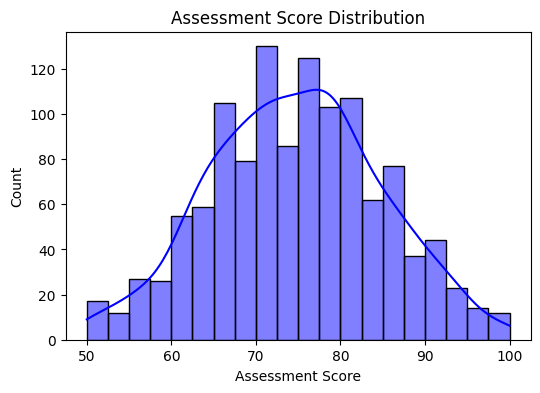

In [7]:
# Distribution of Assessment Score
plt.figure(figsize=(6, 4))
sns.histplot(df['Assessment Score'], bins=20, kde=True, color='blue')
plt.title("Assessment Score Distribution")
plt.show()

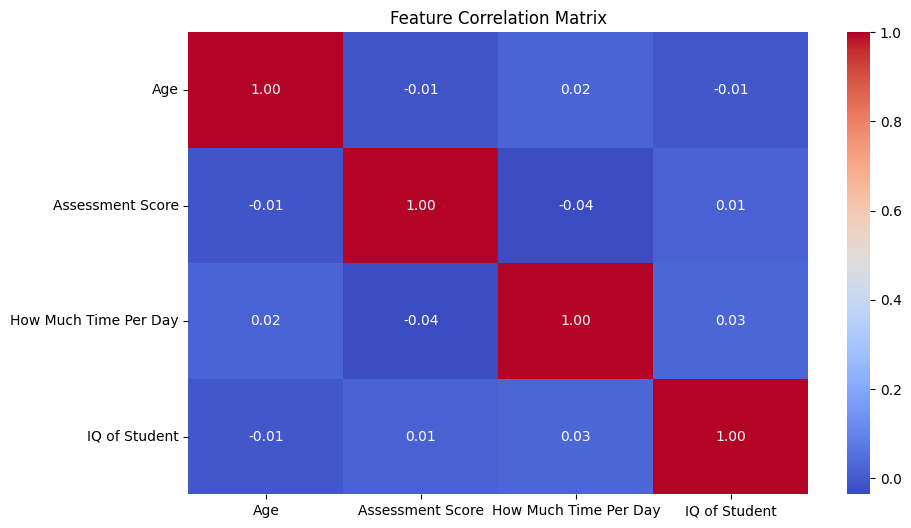

In [8]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [9]:
# Encode categorical columns
label_encoders = {}
categorical_columns = ['Gender', 'Country', 'State', 'City', 'Parent Occupation', 'Earning Class', 'Level of Student', 'Level of Course', 'Course Name', 'Material Level']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
# Feature selection for prediction
X = df[['Age', 'Gender', 'IQ of Student', 'Level of Student', 'Level of Course', 'Material Level', 'How Much Time Per Day']]
y = df['Assessment Score']

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from transformers import pipeline

In [14]:
# Goal 1: Predict Assessment Score & Decide Promotion
def predict_assessment_score():
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    return model

# Train model
model = predict_assessment_score()

df['Predicted Score'] = model.predict(scaler.transform(X))
df['Promotion'] = df['Predicted Score'].apply(lambda x: 'Promote' if x > 50 else 'Repeat')

Mean Absolute Error: 8.672458333333335


In [15]:
# Goal 2: Assign Topics Automatically Based on Level
def assign_topics(level):
    topic_mapping = {
        0: ['Basic Concepts', 'Foundation Topics'],  # Beginner
        1: ['Intermediate Applications', 'Case Studies'],  # Intermediate
        2: ['Advanced Topics', 'Research-Oriented Learning']  # Advanced
    }
    return topic_mapping.get(level, ['General Topics'])

df['Assigned Topics'] = df['Level of Student'].apply(assign_topics)

In [16]:
# Goal 3: Recommend Teaching Materials Based on Predicted Score
def recommend_materials(predicted_score):
    if predicted_score < 40:
        return "Basic Study Material"
    elif 40 <= predicted_score < 70:
        return "Intermediate Study Material"
    else:
        return "Advanced Study Material"

df['Recommended Material'] = df['Predicted Score'].apply(recommend_materials)

In [17]:
# Goal 4: AI-powered text simplification
simplifier = pipeline("text2text-generation", model="facebook/bart-large-cnn")

def simplify_text(text):
    return simplifier(text, max_length=100, min_length=30, do_sample=False)[0]['generated_text']

# Function to Extract Text from TXT File
def extract_text_from_txt(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Ask for Student Name & Subject
student_name = input("Enter Student Name: ")
subject = input("Enter Subject: ")

# Find Student Data
student_data = df[df['Name'] == student_name]

if student_data.empty:
    print("Student not found in dataset.")
else:
    student_info = student_data.iloc[0]
    predicted_score = student_info['Predicted Score']
    recommended_material = student_info['Recommended Material']
    promotion_status = student_info['Promotion']

    print(f"\nStudent: {student_name}")
    print(f"Promotion Status: {promotion_status}")
    print(f"Predicted Score: {predicted_score:.2f}")
    print(f"Recommended Material: {recommended_material}")

    # Extract & Simplify Notes for Entered Subject
    subject_file_mapping = {
        "Astronomy": "/content/Astronomy.txt",
        "Biology": "/content/Biology.txt",
        "Chemistry": "/content/Chemistry.txt",
        "Civics": "/content/Civics.txt",
        "Economics": "/content/Economics.txt",
        "Geography": "/content/Geography.txt",
        "History": "/content/History.txt"
    }

    if subject in subject_file_mapping:
        txt_text = extract_text_from_txt(subject_file_mapping[subject])
        simplified_notes = simplify_text(txt_text[:1000])  # Process a portion to avoid exceeding model limits
        print("\nSimplified Study Notes:", simplified_notes)
    else:
        print("Subject not found in available study materials.")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


Enter Student Name: Dawn Mullins
Enter Subject: History

Student: Dawn Mullins
Promotion Status: Promote
Predicted Score: 76.30
Recommended Material: Advanced Study Material

Simplified Study Notes: Human civilization has evolved through different historical periods, each marked by significant events. Mesopotamia, Egypt, Greece, and Rome contributed to advancements in governance, architecture, and philosophy. The Industrial Revolution (18th-19th century) transformed economies, shifting from agriculture to machine-based industries.


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from transformers import pipeline

# Load dataset
file_path = "/content/intel_student_data_1200.csv"
df = pd.read_csv(file_path)

# Encode categorical columns
label_encoders = {}
categorical_columns = ['Gender', 'Country', 'State', 'City', 'Parent Occupation', 'Earning Class', 'Level of Student', 'Level of Course', 'Course Name', 'Material Level']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature selection for prediction
X = df[['Age', 'Gender', 'IQ of Student', 'Level of Student', 'Level of Course', 'Material Level', 'How Much Time Per Day']]
y = df['Assessment Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Goal 1: Predict Assessment Score & Decide Promotion
def predict_assessment_score():
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    return model

# Train model
model = predict_assessment_score()

df['Predicted Score'] = model.predict(scaler.transform(X))
df['Promotion'] = df['Predicted Score'].apply(lambda x: 'Promote' if x > 50 else 'Repeat')

# Goal 2: Filter Topics Based on Student Level
def filter_topics(student_level):
    if student_level == 'Beginner':
        return ['Basic Concepts', 'Foundation Topics']
    elif student_level == 'Intermediate':
        return ['Intermediate Applications', 'Case Studies']
    else:
        return ['Advanced Topics', 'Research-Oriented Learning']

# Goal 3: Recommend Teaching Materials Based on Predicted Score
def recommend_materials(predicted_score):
    if predicted_score < 40:
        return "Basic Study Material"
    elif 40 <= predicted_score < 70:
        return "Intermediate Study Material"
    else:
        return "Advanced Study Material"

df['Recommended Material'] = df['Predicted Score'].apply(recommend_materials)

# Goal 4: AI-powered text simplification
simplifier = pipeline("text2text-generation", model="facebook/bart-large-cnn")

def simplify_text(text):
    return simplifier(text, max_length=100, min_length=30, do_sample=False)[0]['generated_text']

# Function to Extract Text from TXT File
def extract_text_from_txt(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Interactive Input for Personalized Recommendation
student_name = input("Enter Student Name: ")
subject = input("Enter Subject: ")
student_level = input("Enter Student Level (Beginner/Intermediate/Advanced): ")

# Get topic recommendations based on level
topics = filter_topics(student_level)
print(f"Hello {student_name}, based on your level ({student_level}), we recommend these topics for {subject}: {topics}")

# Extract and Simplify TXT Content
subject_file_mapping = {
    "Astronomy": "/content/Astronomy.txt",
    "Biology": "/content/Biology.txt",
    "Chemistry": "/content/Chemistry.txt",
    "Civics": "/content/Civics.txt",
    "Economics": "/content/Economics.txt",
    "Geography": "/content/Geography.txt",
    "History": "/content/History.txt"
}

if subject in subject_file_mapping:
    txt_text = extract_text_from_txt(subject_file_mapping[subject])
    simplified_notes = simplify_text(txt_text[:1000])  # Processing a portion to avoid exceeding model limits
    print("\nSimplified Study Notes:", simplified_notes)
else:
    print("Subject not found in available study materials.")


Mean Absolute Error: 8.672458333333335


Device set to use cpu


Enter Student Name: Dawn Mullins
Enter Subject: Biology
Enter Student Level (Beginner/Intermediate/Advanced): Advanced
Hello Dawn Mullins, based on your level (Advanced), we recommend these topics for Biology: ['Advanced Topics', 'Research-Oriented Learning']

Simplified Study Notes: All living organisms are made up of fundamental units called cells. Cells are classified into prokaryotic (without a nucleus, like bacteria) and eukaryotic. The nucleus contains genetic material (DNA), controlling the cell’s activities. The mitochondria generate energy through cellular respiration.
